In [399]:
#convert and save notebook to html
# !jupyter nbconvert --to html Notebook.ipynb --output "html_notebook"

# Aufgabenstellung

Die Kantonsstrasse unterhalb Schiers (GR) ist vom Steinschlag betroffen. Steine lösen sich von zwei unterschiedlichen Stellen an der Felswand ab (Ablösungszone 1 und Ablösungszone 2). Der betroffene Strassenabschnitt ist mit Steinfangnetzen gesichert, die jedoch in die Jahre gekommen sind und die angestrebte Sicherheit nicht mehr gewährleisten können. Die Planung für Ersatznetze hat bereits begonnen, kann aber frühstens in einem Jahr umgesetzt werden.

In den letzten Monaten haben sich mehrere Steinschlagereignisse ereignet. Kommt es im Lauf des nächsten Jahres zu weiteren vergleichbaren Ereignissen, könnten die alten Sicherheitsnetze versagen und die Verkehrsteilnehmer einem grossen Sicherheitsrisiko ausgesetzt sein. Die Bevölkerung ist verunsichert und der Kantonsingenieur muss schnell entscheiden, ob das Risiko für die Verkehrsteilnehmer zu gross ist und die Kantonsstrasse vorübergehend gesperrt werden muss. Der Kantonsingenieur hat sie beauftragt, anhand von vorhanden Daten die Wahrscheinlichkeit eines Todesfalls zu berechnen und eine Empfehlung bezüglich der Schliessung bzw Offenhaltung der Strasse auszusprechen.

Damit die Strasse offen bleiben kann, muss gezeigt werden, dass die jährliche Wahrscheinlichkeit von Todesfällen infolge Steinschlags kleiner als 0.0001 ist. Für die Berechnungen soll ein gut strukturierter und dokumentierter Code in Python oder R entwickelt werden.


## Grundlagen

Für die Planung der neuen Sicherheitsnetze, hat ein beauftragter Geologe, über drei Monate Daten zu den Steinschlagereignisse aufgenommen. Dabei wurde Steingeschwindigkeit, Steinmasse und Zeitpunkt und der Zeitpunkt das Ereignis registriert. Diese Daten können von Ihnen zur Modellbildung verwendet werden und stehen unter folgenden Links zur Verfügung:

Ereignis aus Ablösungszone 1: https://www.dropbox.com/s/i58gdv6pzi03rhr/out_1.csv?dl=0

Ereignis aus Ablösungszone 2: https://www.dropbox.com/s/3nk9pv7nzz8f0qb/out_2.csv?dl=0

NB: Die Geschwindigkeit ist durch einen Radar aufgenommen und sehr präzise. Die Masse ist eine Experten-Schätzung des Geologen.

Ein beauftragtes Ingenieurbüro hat geschätzt, dass die Sicherheitsnetze bis zu einer Aufprallenergie von 1000 kJ sicher sind. Falls bereits ein Stein mit über 2000 kg in den Sicherheitsnetzen liegt, beträgt die Aufprallenergie, die von den Sicherheitsnetzen aufgenommen werden kann, nur noch 500 kJ. Steine in den Sicherheitsnetzen werden vom Unterhaltsteam entfernt (die Reaktionszeit beträgt 24 Stunden).

Das tägliche Verkehrsaufkommen beträgt 1200 Autos. Stau kommt auf der Strecke nicht vor. Die Tempolimite beträgt 60 km/h

***

# Setup

In [400]:
#prepration of workspace
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [401]:
#import df
df_zone1 = pd.read_csv("https://www.dropbox.com/s/i58gdv6pzi03rhr/out_1.csv?dl=1")
df_zone2 = pd.read_csv("https://www.dropbox.com/s/3nk9pv7nzz8f0qb/out_2.csv?dl=1")

# Datenbereinigung
## Daten zu Ablösezone 1 bereinigen

In [402]:
#explore dataset
df_zone1

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,2019-01-01,09:00,194.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,21:00,224.0,8.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,14:00,3104.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,15:00,228.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,23:00,755.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [403]:
#rename columns
df_zone1 = df_zone1.rename(columns={"Datum": "date", "Uhrzeit": "time", "Masse [kg]": "mass [kg]", "Geschwindigkeit [m/s]": "vel [m/s]"})

In [404]:
#remove NaN values
df_zone1 = pd.DataFrame(df_zone1)
df_zone1.drop(df_zone1.iloc[:, 4:77],axis = 1, inplace = True )
df_zone1 = df_zone1.iloc[0:68]
display(df_zone1)

,date,time,mass [kg],vel [m/s]
0,2019-01-01,09:00,194.0,8.4
1,2019-01-01,21:00,224.0,8.8
2,2019-01-02,14:00,3104.0,9.2
3,2019-01-04,15:00,228.0,8.0
4,2019-01-05,23:00,755.0,7.0
...,...,...,...,...
63,2019-03-18,16:00,167.0,8.9
64,2019-03-22,18:00,2847.0,7.0
65,2019-03-26,00:00,44.0,8.9
66,2019-03-26,06:00,45.0,8.4


In [405]:
#check datatypes
df_zone1.dtypes

date          object
time          object
mass [kg]    float64
vel [m/s]    float64
dtype: object

In [406]:
#change datatype of column "date"

#connect column date and time
df_zone1["date"] = pd.to_datetime(df_zone1["date"] + " " + df_zone1["time"])

#rearrange columns
df_zone1 = df_zone1[["date", "mass [kg]", "vel [m/s]"]]

In [407]:
#check datatypes
df_zone1.dtypes

date         datetime64[ns]
mass [kg]           float64
vel [m/s]           float64
dtype: object

In [408]:
#sort df by date
df_zone1.sort_values(by = "date", inplace = True)

In [409]:
display(df_zone1)

,date,mass [kg],vel [m/s]
0,2019-01-01 09:00:00,194.0,8.4
1,2019-01-01 21:00:00,224.0,8.8
2,2019-01-02 14:00:00,3104.0,9.2
3,2019-01-04 15:00:00,228.0,8.0
4,2019-01-05 23:00:00,755.0,7.0
...,...,...,...
63,2019-03-18 16:00:00,167.0,8.9
64,2019-03-22 18:00:00,2847.0,7.0
65,2019-03-26 00:00:00,44.0,8.9
66,2019-03-26 06:00:00,45.0,8.4


## Daten zu Ablösezone 2 bereinigen

In [410]:
#explore dataset
df_zone2

,Date,Uhrzeit,m [kg],v [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2019-01-01,09:00,38.0,45.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,06:00,187.0,41.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,10:00,36.0,44.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,14:00,6.0,41.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11,06:00,65.0,39.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-01-11,16:00,58.0,33.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-01-14,11:00,365.0,40.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-01-16,02:00,22.0,46.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-01-18,06:00,146.0,36.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-01-19,17:00,29.0,38.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [411]:
#rename columns
df_zone2 = df_zone2.rename(columns={"Date": "date", "Uhrzeit": "time", "m [kg]": "mass [kg]", "v [m/s]": "vel [m/s]"})

In [412]:
#remove NaN values
df_zone2 = pd.DataFrame(df_zone2)
df_zone2.drop(df_zone2.iloc[:, 4:77],axis = 1, inplace = True )
df_zone2 = df_zone2.iloc[0:32]
display(df_zone2)

,date,time,mass [kg],vel [m/s]
0,2019-01-01,09:00,38.0,45.4
1,2019-01-03,06:00,187.0,41.6
2,2019-01-04,10:00,36.0,44.6
3,2019-01-07,14:00,6.0,41.2
4,2019-01-11,06:00,65.0,39.6
5,2019-01-11,16:00,58.0,33.2
6,2019-01-14,11:00,365.0,40.2
7,2019-01-16,02:00,22.0,46.5
8,2019-01-18,06:00,146.0,36.2
9,2019-01-19,17:00,29.0,38.3


In [413]:
#check datatypes
df_zone2.dtypes

date          object
time          object
mass [kg]    float64
vel [m/s]    float64
dtype: object

In [414]:
#change datatype of column "date"

#connect column date and time
df_zone2["date"] = pd.to_datetime(df_zone2["date"] + " " + df_zone2["time"])

#rearrange columns
df_zone2 = df_zone2[["date", "mass [kg]", "vel [m/s]"]]

In [415]:
#check datatypes
df_zone2.dtypes

date         datetime64[ns]
mass [kg]           float64
vel [m/s]           float64
dtype: object

In [416]:
#sort df by date
df_zone2.sort_values(by = "date", inplace = True)

In [417]:
display(df_zone2)

,date,mass [kg],vel [m/s]
0,2019-01-01 09:00:00,38.0,45.4
1,2019-01-03 06:00:00,187.0,41.6
2,2019-01-04 10:00:00,36.0,44.6
3,2019-01-07 14:00:00,6.0,41.2
4,2019-01-11 06:00:00,65.0,39.6
5,2019-01-11 16:00:00,58.0,33.2
6,2019-01-14 11:00:00,365.0,40.2
7,2019-01-16 02:00:00,22.0,46.5
8,2019-01-18 06:00:00,146.0,36.2
9,2019-01-19 17:00:00,29.0,38.3


## Bereinigen der Messfehler
In der bezeichneten Zone Zwei wurde bei der Datenerfassung vom 10. März 2019 eine Masse von 0.0 Kg dokumentiert. Da diese Eintragung unmöglich ist, impliziert sie einen Fehler innerhalb des Datensatzes.
Zur Korrektur dieses offenkundigen Fehlers stehen uns verschiedene Optionen zur Verfügung, einschließlich der Löschung des fehlerhaften Eintrags oder der Ersetzung durch einen geeigneten Ersatzwert, wie beispielsweise den Median aller vorhandenen Messwerte.
In Anbetracht der Größe unseres Datensatzes, der als relativ klein klassifiziert wird, erscheint eine Imputation als geeignete Lösung. Durch diesen Prozess werden fehlende oder fehlerhafte Daten durch plausible Werte ersetzt, wodurch die Stichprobengröße beibehalten und Verzerrungen minimiert werden können.

In [418]:
#determine median df_zone 2
median_zone2 = df_zone2["mass [kg]"].median()

#input value to df
df_zone2.loc[df_zone2["mass [kg]"] <= 0, "mass [kg]"] = median_zone2

#show data
display(df_zone2)

,date,mass [kg],vel [m/s]
0,2019-01-01 09:00:00,38.0,45.4
1,2019-01-03 06:00:00,187.0,41.6
2,2019-01-04 10:00:00,36.0,44.6
3,2019-01-07 14:00:00,6.0,41.2
4,2019-01-11 06:00:00,65.0,39.6
5,2019-01-11 16:00:00,58.0,33.2
6,2019-01-14 11:00:00,365.0,40.2
7,2019-01-16 02:00:00,22.0,46.5
8,2019-01-18 06:00:00,146.0,36.2
9,2019-01-19 17:00:00,29.0,38.3


In [419]:
#sort data by Date
df_zone1.sort_values(by = "date", ascending = True, inplace = True)
display(df_zone1)

df_zone2.sort_values(by = "date", ascending = True, inplace = True)
display(df_zone2)


,date,mass [kg],vel [m/s]
0,2019-01-01 09:00:00,194.0,8.4
1,2019-01-01 21:00:00,224.0,8.8
2,2019-01-02 14:00:00,3104.0,9.2
3,2019-01-04 15:00:00,228.0,8.0
4,2019-01-05 23:00:00,755.0,7.0
...,...,...,...
63,2019-03-18 16:00:00,167.0,8.9
64,2019-03-22 18:00:00,2847.0,7.0
65,2019-03-26 00:00:00,44.0,8.9
66,2019-03-26 06:00:00,45.0,8.4


,date,mass [kg],vel [m/s]
0,2019-01-01 09:00:00,38.0,45.4
1,2019-01-03 06:00:00,187.0,41.6
2,2019-01-04 10:00:00,36.0,44.6
3,2019-01-07 14:00:00,6.0,41.2
4,2019-01-11 06:00:00,65.0,39.6
5,2019-01-11 16:00:00,58.0,33.2
6,2019-01-14 11:00:00,365.0,40.2
7,2019-01-16 02:00:00,22.0,46.5
8,2019-01-18 06:00:00,146.0,36.2
9,2019-01-19 17:00:00,29.0,38.3


## Zeitdifferenz zwischen Ablösungen berechnen

In [420]:
#create column to assign running time difference in hours
df_zone1["timediff [h]"] = 0
df_zone1["timediff [h]"] = (df_zone1["date"] -
                                       df_zone1["date"].shift(1)).astype("timedelta64[h]")
display(df_zone1)

df_zone2["timediff [h]"] = 0
df_zone2["timediff [h]"] = (df_zone2["date"] -
                                       df_zone2["date"].shift(1)).astype("timedelta64[h]")
display(df_zone2)


,date,mass [kg],vel [m/s],timediff [h]
0,2019-01-01 09:00:00,194.0,8.4,NaN
1,2019-01-01 21:00:00,224.0,8.8,12.0
2,2019-01-02 14:00:00,3104.0,9.2,17.0
3,2019-01-04 15:00:00,228.0,8.0,49.0
4,2019-01-05 23:00:00,755.0,7.0,32.0
...,...,...,...,...
63,2019-03-18 16:00:00,167.0,8.9,28.0
64,2019-03-22 18:00:00,2847.0,7.0,98.0
65,2019-03-26 00:00:00,44.0,8.9,78.0
66,2019-03-26 06:00:00,45.0,8.4,6.0


,date,mass [kg],vel [m/s],timediff [h]
0,2019-01-01 09:00:00,38.0,45.4,NaN
1,2019-01-03 06:00:00,187.0,41.6,45.0
2,2019-01-04 10:00:00,36.0,44.6,28.0
3,2019-01-07 14:00:00,6.0,41.2,76.0
4,2019-01-11 06:00:00,65.0,39.6,88.0
5,2019-01-11 16:00:00,58.0,33.2,10.0
6,2019-01-14 11:00:00,365.0,40.2,67.0
7,2019-01-16 02:00:00,22.0,46.5,39.0
8,2019-01-18 06:00:00,146.0,36.2,52.0
9,2019-01-19 17:00:00,29.0,38.3,35.0


Die Zeitdifferenz der ersten einträge wurden fälschlicherweise als NaN geschrieben. Dieser werden nun mit einer Null ersetzt

In [421]:
df_zone1["timediff [h]"].fillna(0,inplace=True)
df_zone2["timediff [h]"].fillna(0,inplace=True)


# Analyse der Daten

In [422]:
#overview of dataframe df_zone1 and df_zone2
df_zone1.describe()


,mass [kg],vel [m/s],timediff [h]
count,68.000000,68.000000,68.000000
mean,628.632353,8.788235,30.102941
std,695.884703,1.989189,27.789260
min,12.000000,3.600000,0.000000
25%,214.750000,7.300000,5.750000
50%,402.500000,8.800000,22.000000
75%,773.000000,10.125000,49.000000
max,3104.000000,14.100000,113.000000


In [423]:
df_zone2.describe()

,mass [kg],vel [m/s],timediff [h]
count,32.000000,32.000000,32.000000
mean,101.062500,37.790625,64.250000
std,102.785382,5.395778,55.533193
min,3.000000,24.900000,0.000000
25%,37.750000,33.200000,27.750000
50%,58.000000,38.750000,48.500000
75%,140.000000,41.725000,77.250000
max,406.000000,46.500000,212.000000


## Boxplots

Im ersten Schritt der Datenanalyse erfolgt die Untersuchung der einzelnen Datensätze mittels Boxplots. Diese Methode ermöglicht eine detaillierte Visualisierung der Datenverteilung und fördert somit das Verständnis für ihre strukturellen Eigenschaften. Des Weiteren hilft sie dabei, potentielle Ausreißer zu identifizieren, die eine bedeutende Auswirkung auf nachfolgende statistische Analysen und Modellierungen haben könnten.

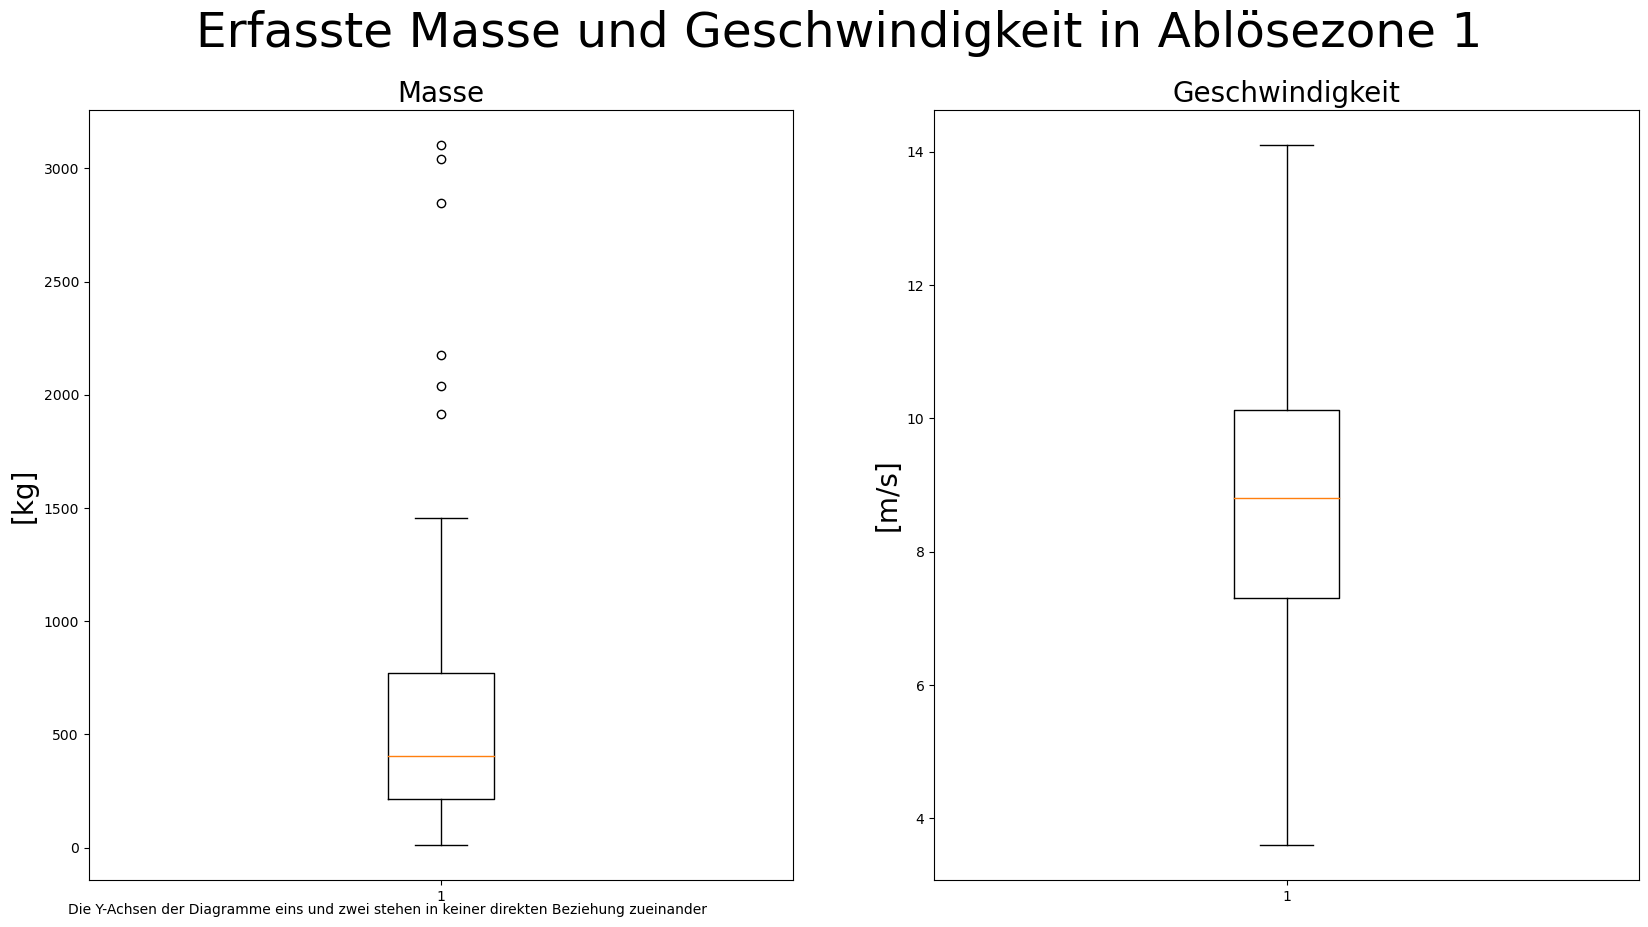

In [424]:
#boxplot of attributes "mass" and "velocity"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.boxplot(df_zone1["mass [kg]"])
ax1.set_xlabel("", fontsize = 20)
ax1.set_ylabel("[kg]", fontsize = 20)
ax1.set_title("Masse", fontsize = 20)

#subplot 1
ax2.boxplot(df_zone1["vel [m/s]"])
ax2.set_ylabel("[m/s]", fontsize = 20)
ax2.set_title("Geschwindigkeit", fontsize = 20)

#overall title
plt.suptitle("Erfasste Masse und Geschwindigkeit in Ablösezone 1", fontsize = 35)

#footnote
x = -0.03
y = -0.03
ax1.text(x, y, "Die Y-Achsen der Diagramme eins und zwei stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()

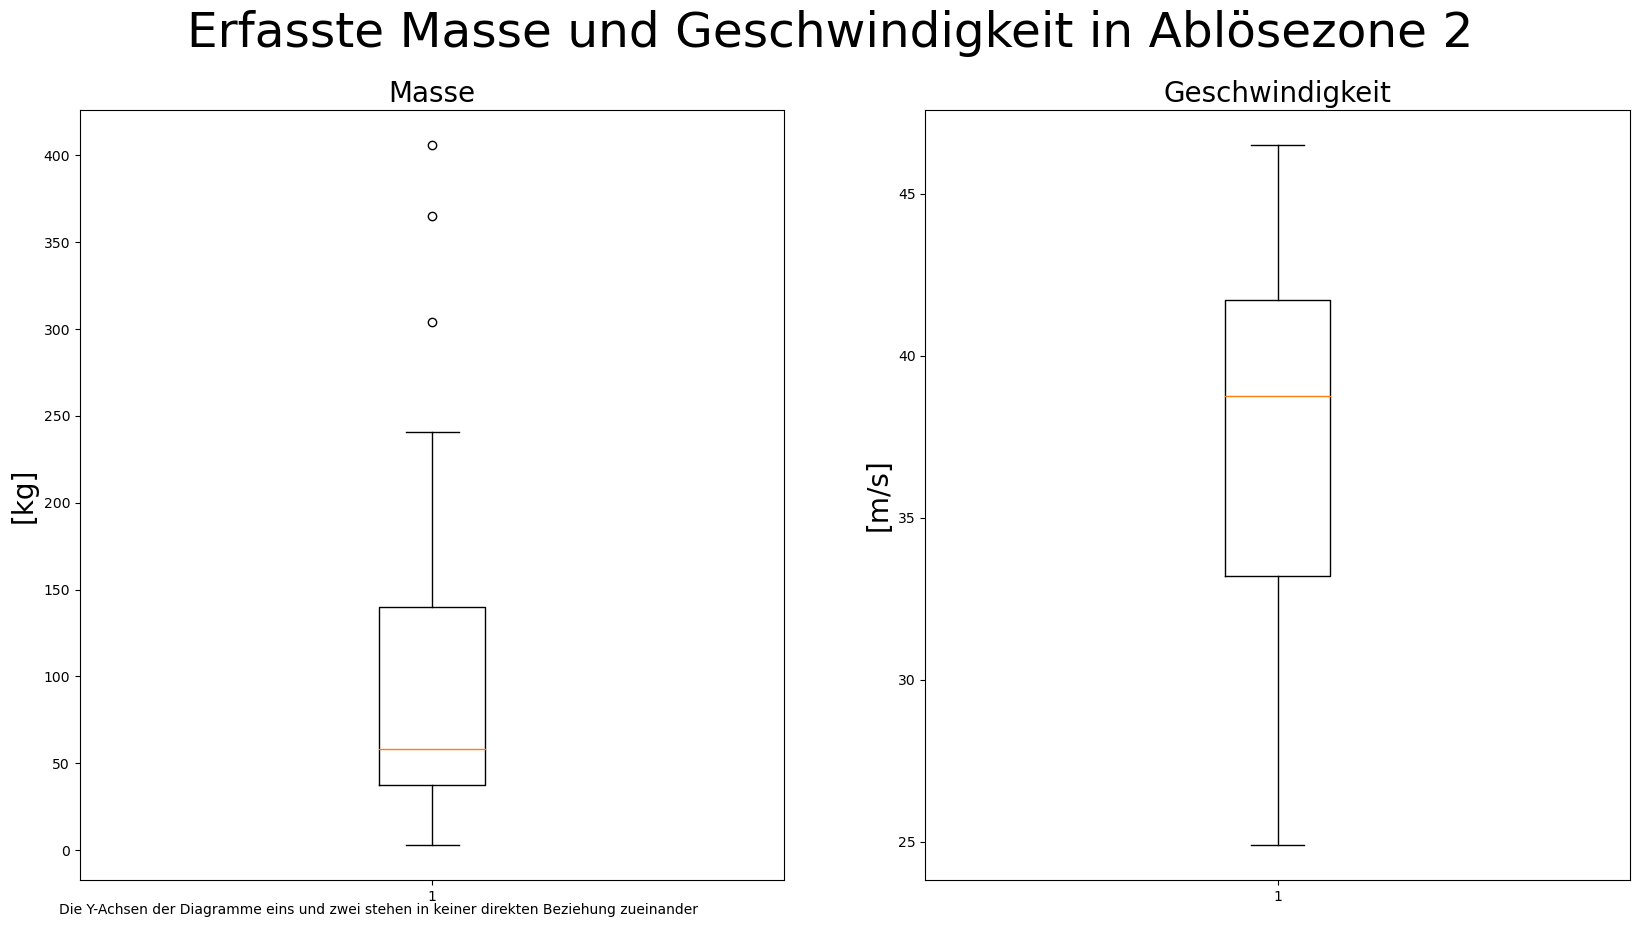

In [425]:
#boxplot of attributes "mass" and "velocity"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.boxplot(df_zone2["mass [kg]"])
ax1.set_xlabel("", fontsize = 20)
ax1.set_ylabel("[kg]", fontsize = 20)
ax1.set_title("Masse", fontsize = 20)


#subplot 1
ax2.boxplot(df_zone2["vel [m/s]"])
ax2.set_ylabel("[m/s]", fontsize = 20)
ax2.set_title("Geschwindigkeit", fontsize = 20)


#overall title
plt.suptitle("Erfasste Masse und Geschwindigkeit in Ablösezone 2", fontsize = 35)

#footnote
x = -0.03
y = -0.03
ax1.text(x, y, "Die Y-Achsen der Diagramme eins und zwei stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()


## Histogramme

Um die Verteilung der Daten weiter zu analysieren, werden Histogramme verwendet.

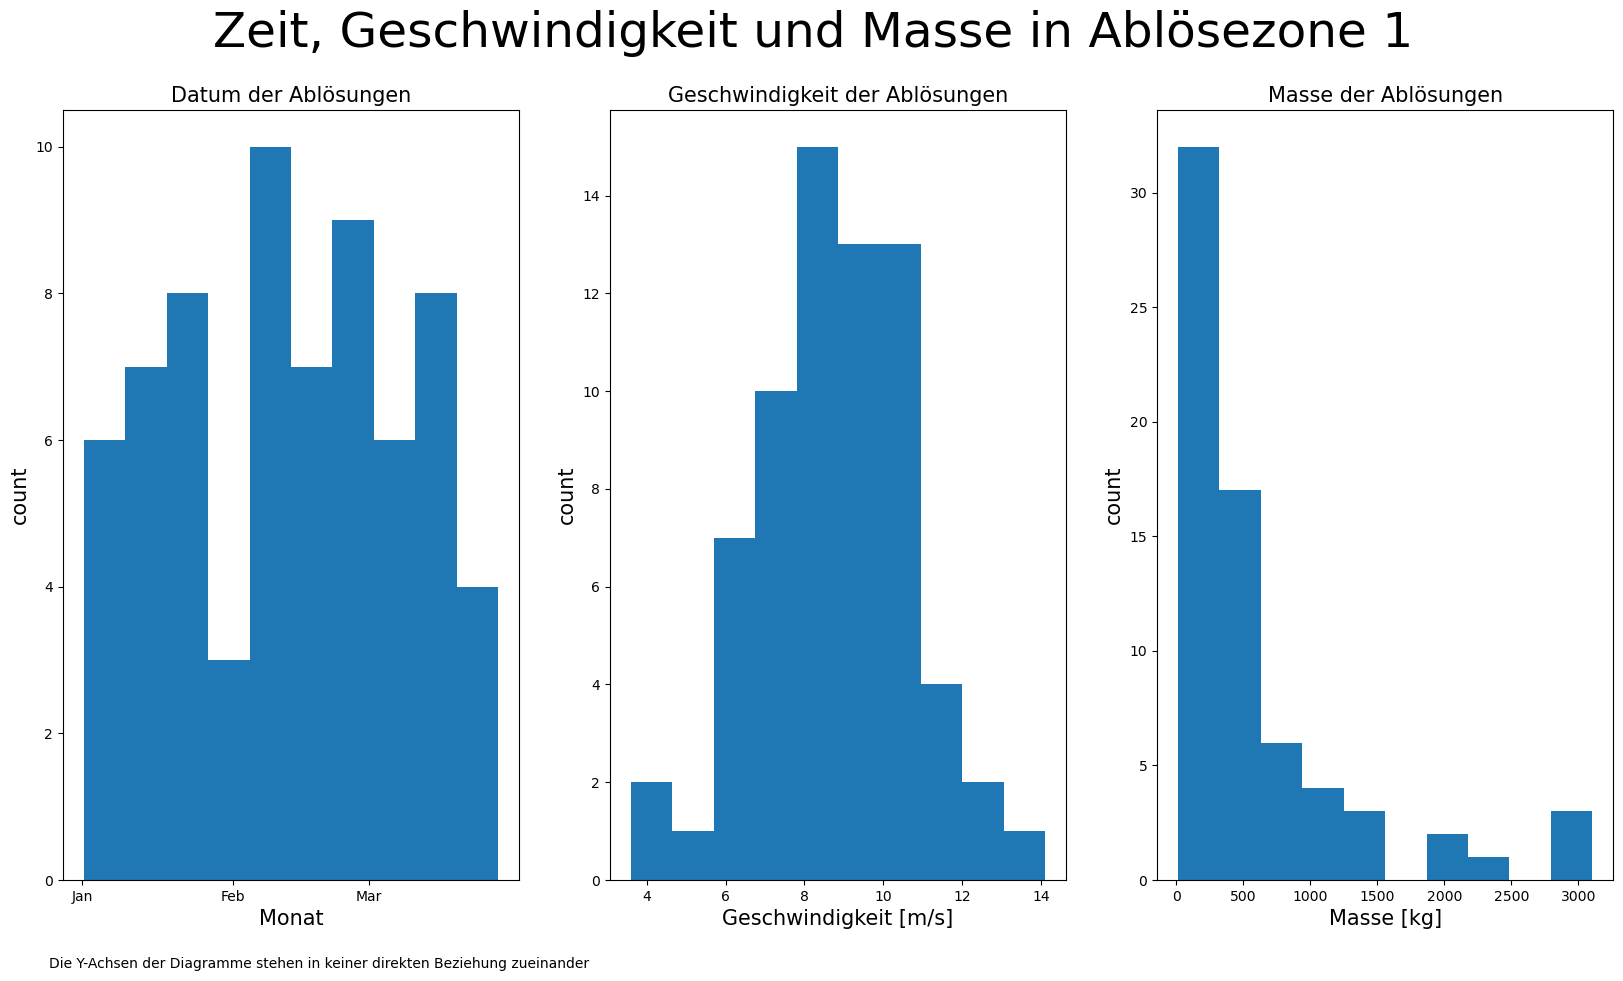

In [426]:
#boxplot of attributes "time", "mass" and "velocity"
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

#subplot 1
ax1.hist(df_zone1["date"])
ax1.set_xlabel("", fontsize = 15)
ax1.set_ylabel("count", fontsize = 15)
ax1.set_xlabel("Monat", fontsize = 15)
ax1.set_title("Datum der Ablösungen", fontsize = 15)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))


#subplot 2
ax2.hist(df_zone1["vel [m/s]"])
ax2.set_ylabel("count", fontsize = 15)
ax2.set_xlabel("Geschwindigkeit [m/s]", fontsize = 15)
ax2.set_title("Geschwindigkeit der Ablösungen", fontsize = 15)

#subplot 3
ax3.hist(df_zone1["mass [kg]"])
ax3.set_ylabel("count", fontsize = 15)
ax3.set_xlabel("Masse [kg]", fontsize = 15)
ax3.set_title("Masse der Ablösungen", fontsize = 15)

#overall title
plt.suptitle("Zeit, Geschwindigkeit und Masse in Ablösezone 1", fontsize = 35)

#footnote
x = -0.03
y = -0.1
ax1.text(x, y, "Die Y-Achsen der Diagramme stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()

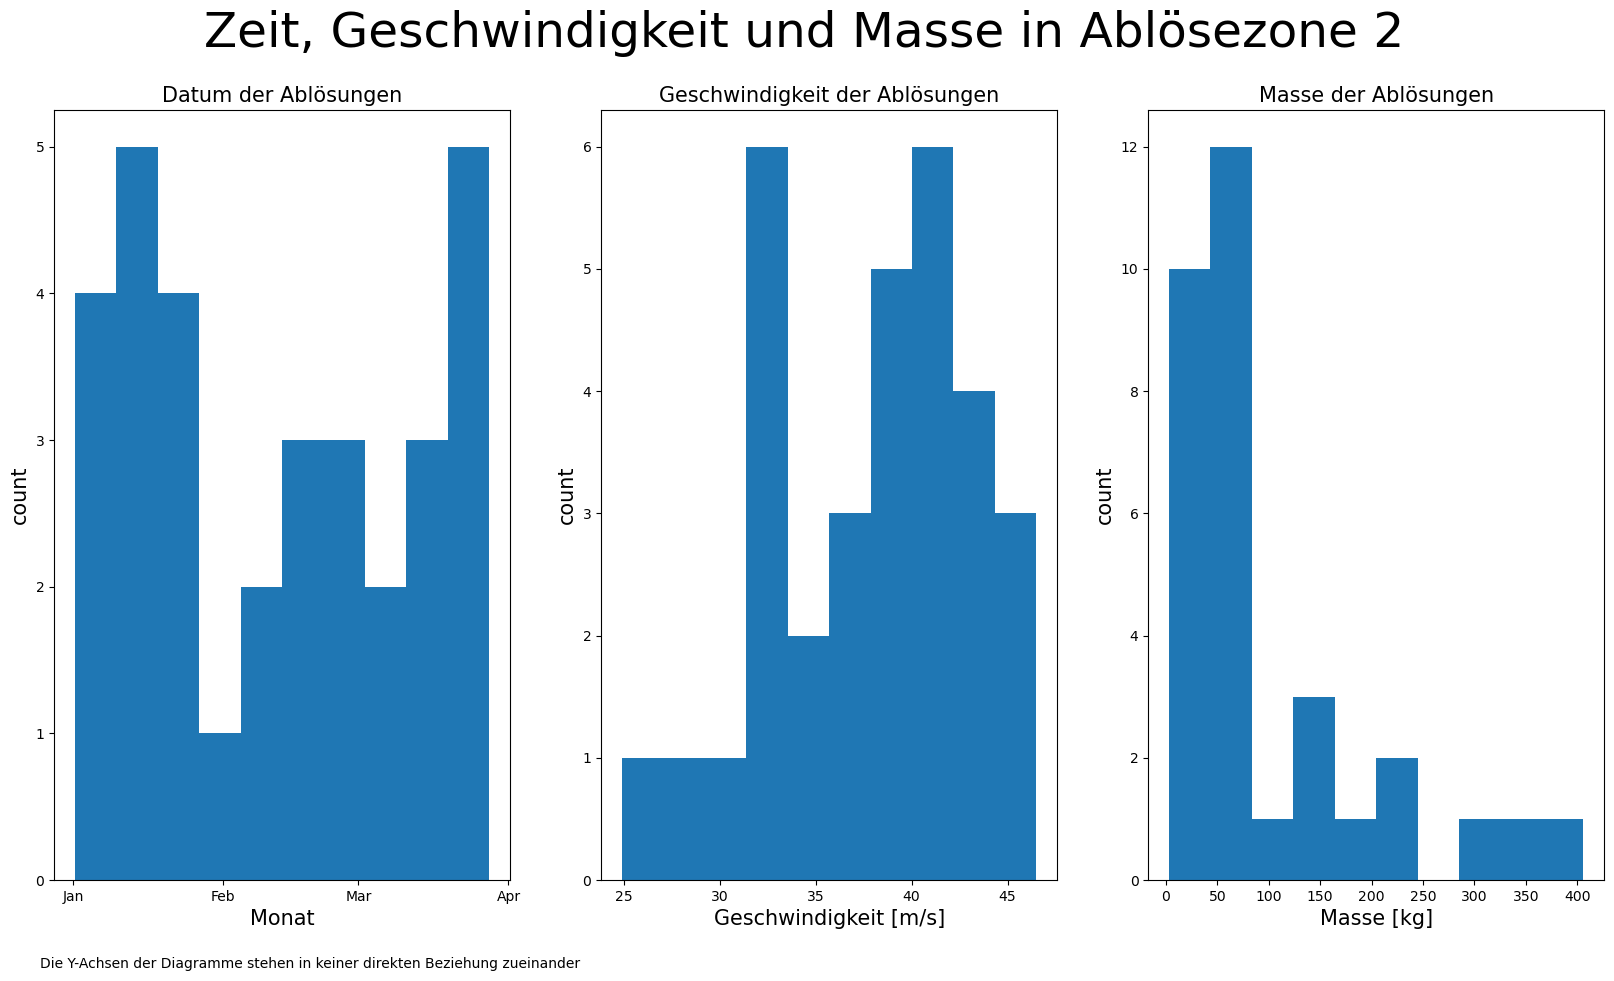

In [427]:
#boxplot of attributes "time", "mass" and "velocity"
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

#subplot 1
ax1.hist(df_zone2["date"])
ax1.set_xlabel("", fontsize = 15)
ax1.set_ylabel("count", fontsize = 15)
ax1.set_xlabel("Monat", fontsize = 15)
ax1.set_title("Datum der Ablösungen", fontsize = 15)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))


#subplot 2
ax2.hist(df_zone2["vel [m/s]"])
ax2.set_ylabel("count", fontsize = 15)
ax2.set_xlabel("Geschwindigkeit [m/s]", fontsize = 15)
ax2.set_title("Geschwindigkeit der Ablösungen", fontsize = 15)

#subplot 3
ax3.hist(df_zone2["mass [kg]"])
ax3.set_ylabel("count", fontsize = 15)
ax3.set_xlabel("Masse [kg]", fontsize = 15)
ax3.set_title("Masse der Ablösungen", fontsize = 15)

#overall title
plt.suptitle("Zeit, Geschwindigkeit und Masse in Ablösezone 2", fontsize = 35)

#footnote
x = -0.03
y = -0.1
ax1.text(x, y, "Die Y-Achsen der Diagramme stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()

## Streudiagramme

Zur direkten Gegenüberstellung und Analyse der betreffenden Datensätze wurden Streudiagramme erstellt.

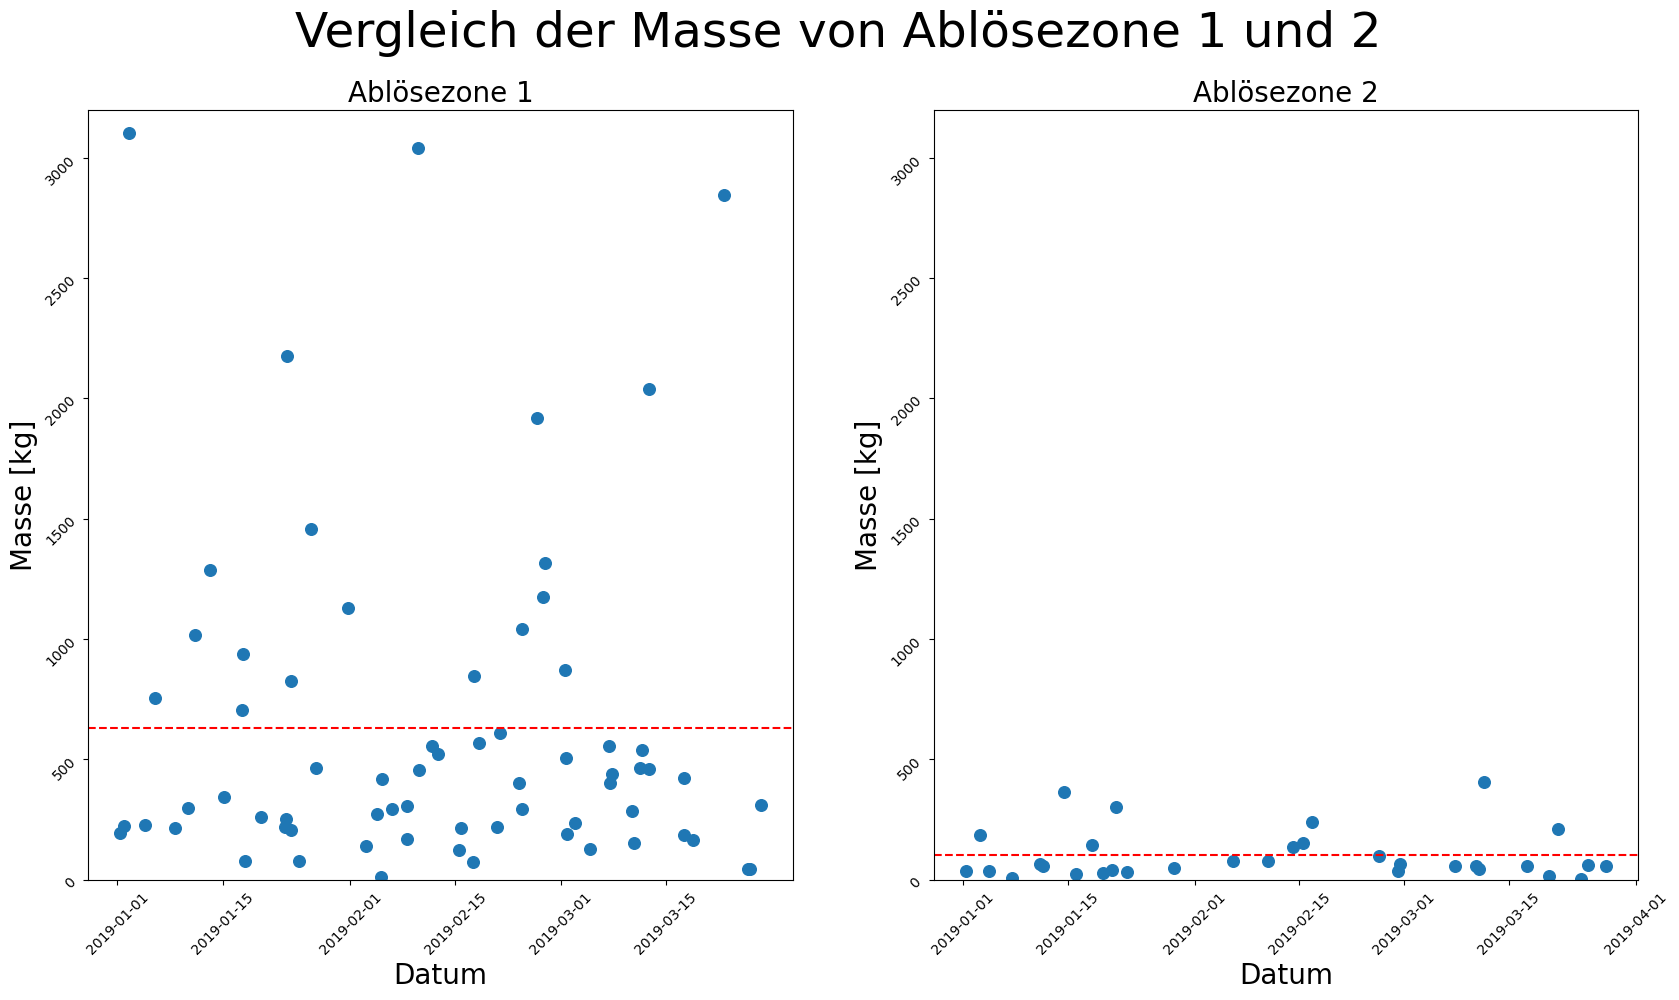

In [428]:
#compare mass of the fallen rocks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.scatter(df_zone1["date"], df_zone1["mass [kg]"], s = 70)
ax1.set_xlabel("Datum", fontsize = 20)
ax1.set_ylabel("Masse [kg]", fontsize = 20)
ax1.set_title("Ablösezone 1", fontsize = 20)
ax1.set_ylim(bottom=0, top=3200)

#subplot 1
ax2.scatter(df_zone2["date"], df_zone2["mass [kg]"], s = 70)
ax2.set_xlabel("Datum", fontsize = 20)
ax2.set_ylabel("Masse [kg]", fontsize = 20)
ax2.set_title("Ablösezone 2", fontsize = 20)
ax2.set_ylim(bottom=0, top=3200)

#overall title
plt.suptitle("Vergleich der Masse von Ablösezone 1 und 2", fontsize = 35)

#add meanline
zone1_mean = df_zone1["mass [kg]"].mean()
ax1.axhline(zone1_mean, color='r', linestyle='--')

zone2_mean = df_zone2["mass [kg]"].mean()
ax2.axhline(zone2_mean, color='r', linestyle='--')


#change angle of labels
for ax in fig.axes:
    ax.tick_params(labelrotation = 45)

plt.show()

Eine Gegenüberstellung der beiden Ablösezonen zeigt, dass Steinschläge in Zone 1 häufiger vorkommen als in Zone 2. Weiter wird ersichtlich, dass sich im Zone 1 Steine mit grösserer Masse ablösen.


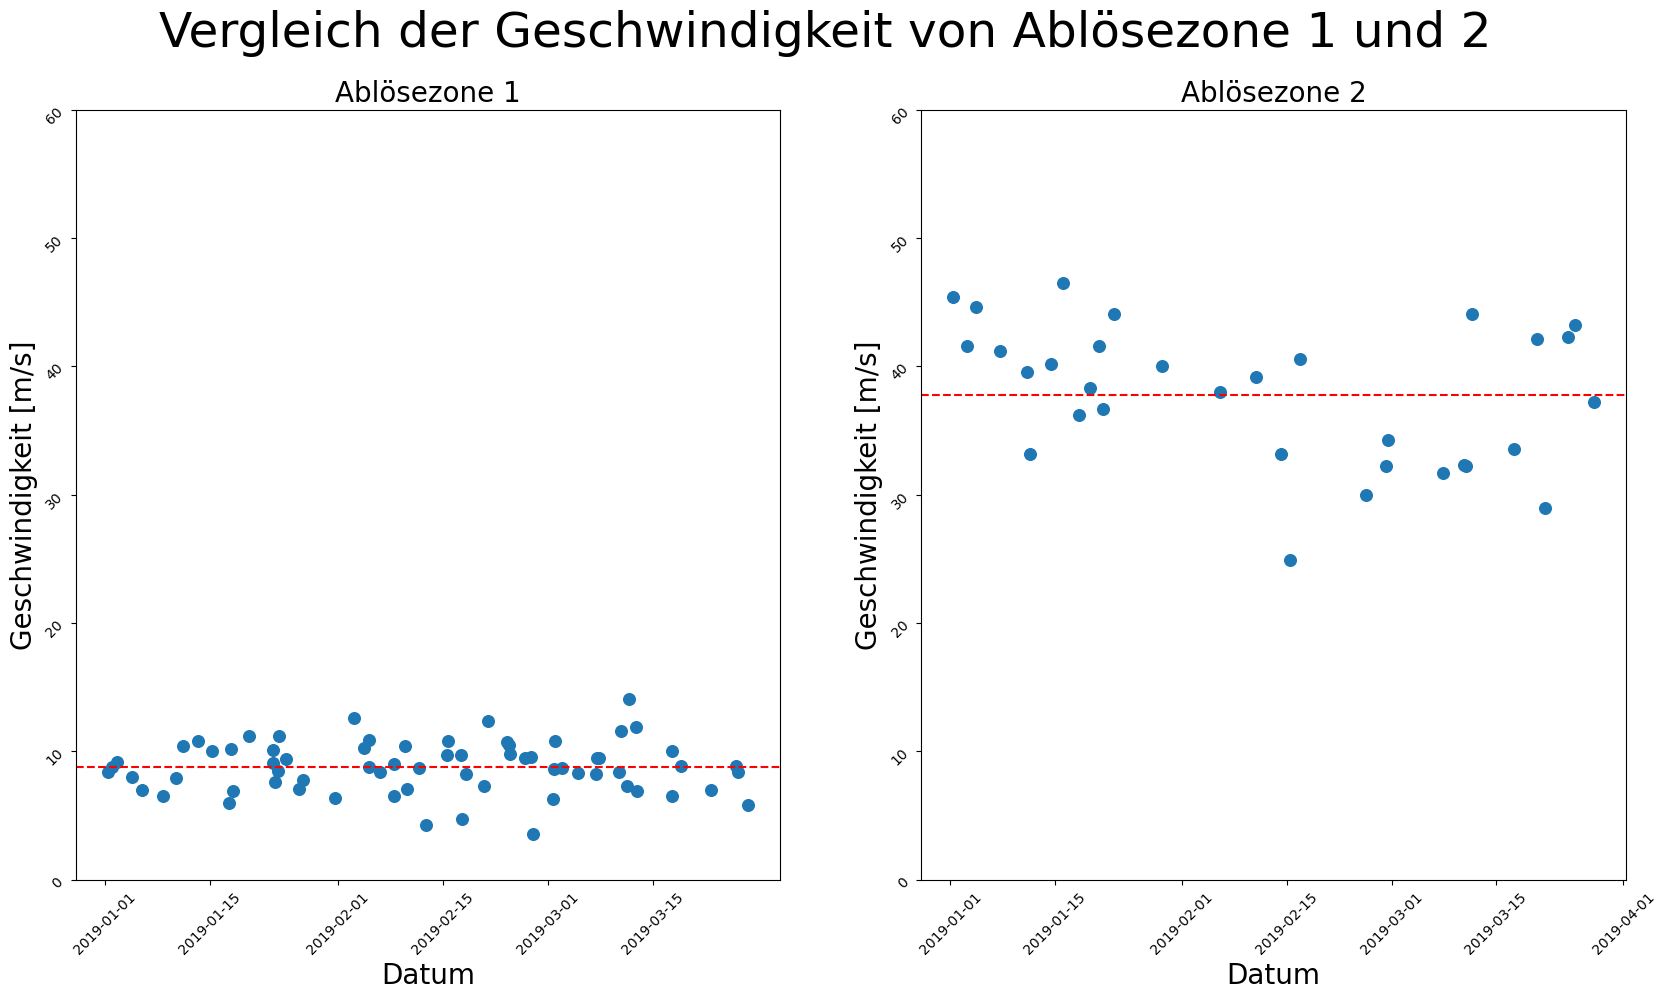

In [429]:
#compare velocity of the fallen rocks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.scatter(df_zone1["date"], df_zone1["vel [m/s]"], s = 70)
ax1.set_xlabel("Datum", fontsize = 20)
ax1.set_ylabel("Geschwindigkeit [m/s]", fontsize = 20)
ax1.set_title("Ablösezone 1", fontsize = 20)
ax1.set_ylim(bottom=0, top=60)

#subplot 1
ax2.scatter(df_zone2["date"], df_zone2["vel [m/s]"], s = 70)
ax2.set_xlabel("Datum", fontsize = 20)
ax2.set_ylabel("Geschwindigkeit [m/s]", fontsize = 20)
ax2.set_title("Ablösezone 2", fontsize = 20)
ax2.set_ylim(bottom=0, top=60)

#overall title
plt.suptitle("Vergleich der Geschwindigkeit von Ablösezone 1 und 2", fontsize = 35)

#add meanline
zone1_mean = df_zone1["vel [m/s]"].mean()
ax1.axhline(zone1_mean, color='r', linestyle='--')

zone2_mean = df_zone2["vel [m/s]"].mean()
ax2.axhline(zone2_mean, color='r', linestyle='--')

#change angle of labels
for ax in fig.axes:
    ax.tick_params(labelrotation = 45)

plt.show()

Steine welche sich aus Zone 1 ablösen, weisen eine geringere Geschwindigkeit auf, als jene die sich aus Zone 2 ablösen.

# Optimale Verteilungsfunktion finden

Um die optimale Wahrscheinlichkeitsverteilung für die gegebenen Daten zu ermitteln, erzeugen wir kumulative Verteilungsfunktionen (CDFs) basierend auf einer Reihe verschiedener theoretischer Verteilungen, einschließlich der Normalverteilung und der Exponentialverteilung. Die Auswahl der korrekten Verteilungsannahme ist von entscheidender Bedeutung, da diese stark in die Simulationen einfließt und folglich einen erheblichen Einfluss auf das endgültige Ergebnis hat.
Dies führen wir mithilfe des "Fitter" Pakets durch. Das Fitter-Paket verwendet die Scipy-Bibliothek, welche 80 Verteilungsfunktionen unterstützt. Der Fitter scannt alle diese Verteilungen, ruft die Anpassungsfunktion auf, ignoriert diejenigen die fehlschlagen oder ewig laufen, und gibt schliesslich eine Zusammenfassung der besten Verteilungen im Sinne der Summe der quadratischen Fehler.
Die Fitter-Bibliothek verfügt auch über eine Methode get_common_distribution(), welche 10 gängigsten Verteilungen enthält. Um die Effizienz zu erhöhen und den Zeitaufwand zu minimieren, verwenden wir diese spezifische Methode.

## Beurteilung der Ablösezone 1

### Geschwindigkeit

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 57.68it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.007418,559.582300,-277.984954,inf,0.059355,0.958730
lognorm,1.008072,561.995251,-273.721325,inf,0.060469,0.951994
gamma,1.010142,560.352868,-273.581846,inf,0.063807,0.928074
chi2,1.017533,558.084152,-273.086111,inf,0.075881,0.800376
exponpow,1.047920,542.377735,-271.085098,inf,0.073655,0.827877


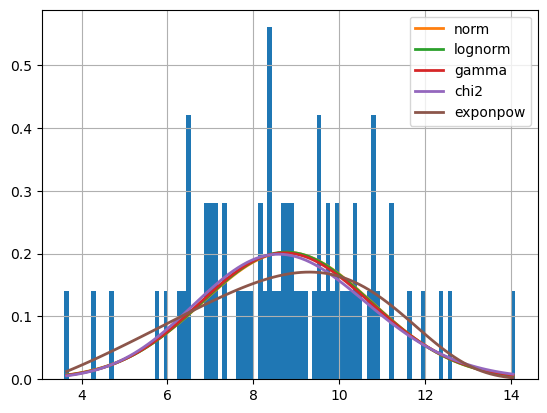

In [430]:
#convert data to NumPy array
df1_vel = df_zone1["vel [m/s]"].values

#fit common distributions to find best
f = Fitter(df1_vel, distributions= get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()


### Masse

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 50.63it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.000018,1940.238453,-1022.231129,inf,0.180140,0.021090
expon,0.000019,1790.287904,-1019.387389,inf,0.112432,0.331307
gamma,0.000021,1765.999570,-1005.105427,inf,0.117606,0.281179
exponpow,0.000025,1710.846111,-994.899365,inf,0.205474,0.005390
rayleigh,0.000026,1836.215380,-997.271310,inf,0.261453,0.000137


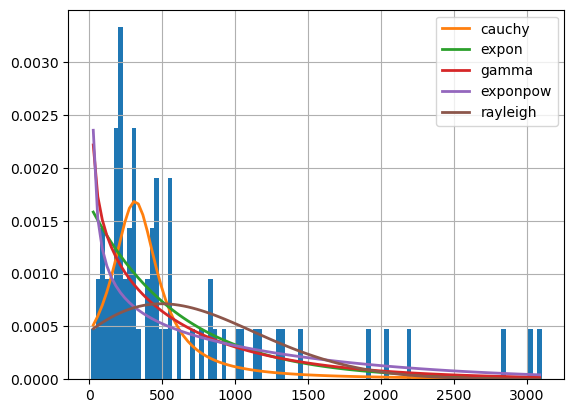

In [431]:
#convert data to NumPy array
df1_mas = df_zone1["mass [kg]"].values

#fit common distributions to find best
f = Fitter(df1_mas, distributions= get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()


### Datum

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 43.00it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.009305,1083.141638,-592.320595,inf,0.136433,1.448224e-01
expon,0.011535,1060.303179,-581.926045,inf,0.116051,2.956436e-01
powerlaw,0.011755,969.172821,-576.423864,inf,0.211673,3.753727e-03
exponpow,0.013617,991.751233,-566.426218,inf,0.204460,5.712653e-03
lognorm,0.015316,1404.160893,-558.428202,inf,0.398160,3.083183e-10


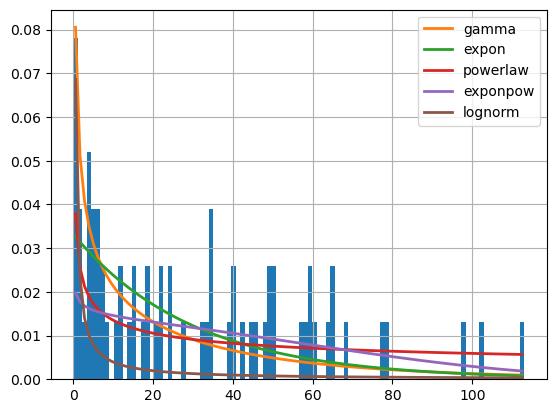

In [432]:
#convert data to NumPy array
df1_date = df_zone1["timediff [h]"].values

#fit common distributions to find best
f = Fitter(df1_date, distributions = get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()


## Beurteilung der Ablösezone 2

### Geschwindigkeit


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 53.05it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,0.597241,639.857044,-117.000238,inf,0.097770,0.890595
norm,0.607154,675.068739,-119.939229,inf,0.104641,0.839121
lognorm,0.607272,676.904694,-116.467247,inf,0.105850,0.829241
chi2,0.608647,677.413072,-116.394853,inf,0.113398,0.763308
gamma,0.608798,677.225194,-116.386964,inf,0.113424,0.763071


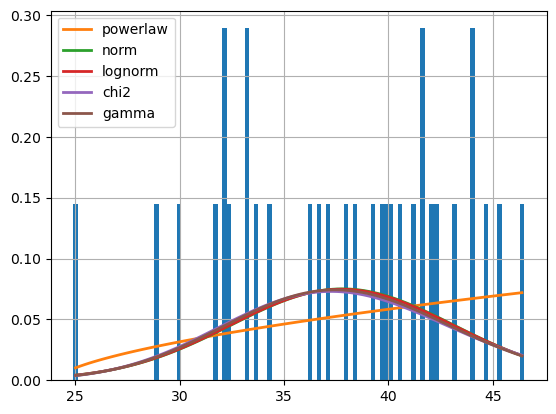

In [433]:
#convert data to NumPy array
df2_vel = df_zone2["vel [m/s]"].values

#fit common distributions to find best
f = Fitter(df2_vel, distributions= get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()


### Masse

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 48.13it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.001738,1510.918873,-307.334987,inf,0.190832,0.170510
expon,0.002070,1332.083403,-301.742318,inf,0.157689,0.365264
gamma,0.002088,1332.656086,-298.001909,inf,0.151540,0.413322
exponpow,0.002170,1303.743237,-296.763649,inf,0.196140,0.148793
chi2,0.002280,1378.205371,-295.181272,inf,0.215930,0.086558


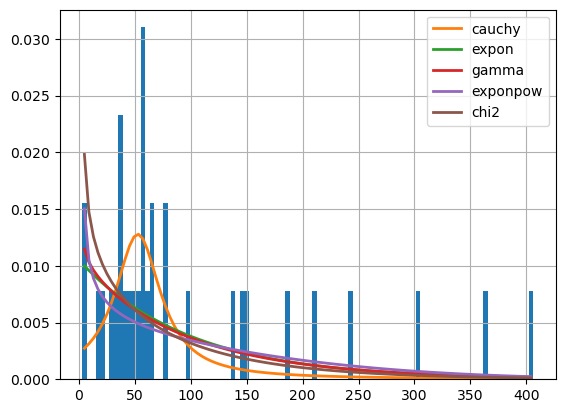

In [434]:
#convert data to NumPy array
df2_mas = df_zone2["mass [kg]"].values

#fit common distributions to find best
f = Fitter(df2_mas, distributions= get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()


### Datum

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 60.38it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.006085,1180.456599,-263.770376,inf,0.067778,0.996290
gamma,0.006085,1165.627059,-263.769783,inf,0.079356,0.978111
expon,0.006240,1166.517434,-266.431264,inf,0.124357,0.659935
exponpow,0.006321,1122.241560,-262.551948,inf,0.188953,0.178767
cauchy,0.006523,1261.312292,-265.008151,inf,0.174832,0.251141


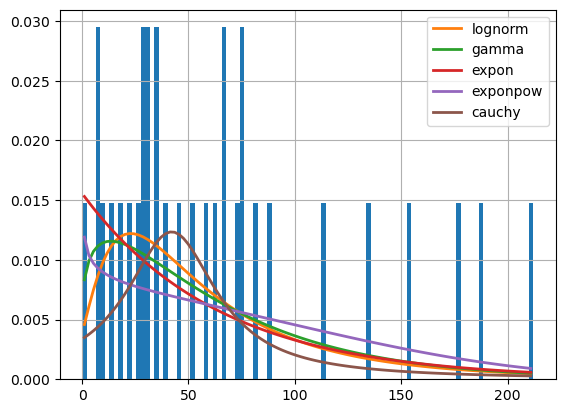

In [435]:
#convert data to NumPy array
df2_date = df_zone2["timediff [h]"].values

#fit common distributions to find best
f = Fitter(df2_date, distributions = get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()
